In [1]:
import automata_render

from automata_environment import AutomataEnvironment
from conways_rules import ConwaysRules
from neural_rules import NeuralRules
from simple_conv_net import SimpleConvNet
from automata_convolution_trainer import AutomataConvolutionTrainer, OptimizerType

Densely pack gliders in opposing directions.

In [2]:
glider_comb = AutomataEnvironment(ConwaysRules(), 40, 50)
# glider_comb.set_state_from_strings([
#     "________________________________________",
#     "_XXX________X________XXX________X_______",
#     "___X_______X___________X_______X________",
#     "__X________XXX________X________XXX______",
#     "________________________________________",
#     "________________________________________",
#     "_______X________XXX________X________XXX_",
#     "______X___________X_______X___________X_",
#     "______XXX________X________XXX________X__",
#     "________________________________________",
#     "________________________________________",
#     "__X________XXX________X________XXX______",
#     "_X___________X_______X___________X______",
#     "_XXX________X________XXX________X_______",
#     "________________________________________",
#     "________________________________________",
#     "______XXX________X________XXX________X__",
#     "________X_______X___________X_______X___",
#     "_______X________XXX________X________XXX_",
#     "________________________________________",
# ])
glider_comb.set_state_from_strings([
    "________________________________________",
    "_XXX__XXX__XXX__XXX__XXX__XXX__XXX__XXX_",
    "___X____X____X____X____X____X____X____X_",
    "__X____X____X____X____X____X____X____X__",
    "________________________________________",
] * 7)

automata_render.inline_video(glider_comb, frame_interval_millis = 20, frame_count = 20, loop = True)

Initialize a random neural automata and initialize with the same glider land state.  Render in a short, fast loop to highlight fluctuations, since the convolution tends to rapidly zero out the environment.

In [37]:
conv_net = SimpleConvNet(hidden_channels = 20).double()
neural_rules = NeuralRules(conv_net)
neural_environment = AutomataEnvironment(neural_rules, 40, 50)

neural_environment.set_state_from_strings([
    "________________________________________",
    "_XXX__XXX__XXX__XXX__XXX__XXX__XXX__XXX_",
    "___X____X____X____X____X____X____X____X_",
    "__X____X____X____X____X____X____X____X__",
    "________________________________________",
] * 7)

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30, loop = True)

Now train that conv net on gliders and see if it learns how to make gliders move.

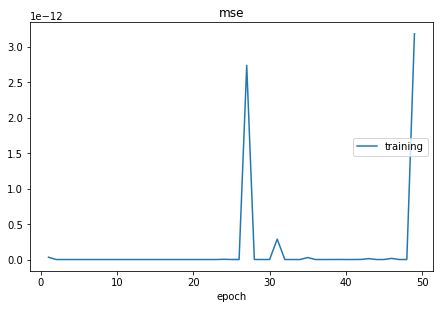

MSE: 3.1803723938570388e-12
Iteration: 4900 (98.0%)


In [44]:
trainer = AutomataConvolutionTrainer(
    conv_net,
    OptimizerType.ADAM,
    learning_rate = 1e-7)

from livelossplot import PlotLosses
liveplot = PlotLosses()

def progress_callback(iteration, progress_percent, mse):
    liveplot.update({
        'mse': mse,
    })
    liveplot.draw()
    print("MSE: " + str(mse))
    print("Iteration: " + str(iteration) + " (" + str(progress_percent) + "%)")

loss_history = trainer.train_by_iteration(
    conv_net,
    glider_comb,
    iterations_to_train = 5000,
    progress_callback = progress_callback,
    progress_callback_iteration_period = 100)

Do the same thing again with the trained environment.

In [45]:
neural_environment.set_state_from_strings([
    "________________________________________",
    "_XXX__XXX__XXX__XXX__XXX__XXX__XXX__XXX_",
    "___X____X____X____X____X____X____X____X_",
    "__X____X____X____X____X____X____X____X__",
    "________________________________________",
] * 7)

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30, loop = True)

In [7]:
neural_environment.set_state_from_strings([
    "________________________________________",
    "________________________________________",
    "__________________XXX___________________",
    "________________________________________",
    "________________________________________",
] * 7)

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30, loop = True)

In [8]:
neural_environment.set_state_from_strings([
    "________________________________________",
    "________________________________________",
    "__________________XXX___________________",
    "__________________X_____________________",
    "___________________X____________________",
] * 7)

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30, loop = True)

In [9]:
neural_environment.randomize_state()

automata_render.inline_video(neural_environment, frame_interval_millis = 100, frame_count = 30, loop = True)